<a href="https://colab.research.google.com/github/racs2019/Data-Science-Basics-Series/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Richard Acs - Z23536011 - 9/29/23 - Dr. DeGiorgio

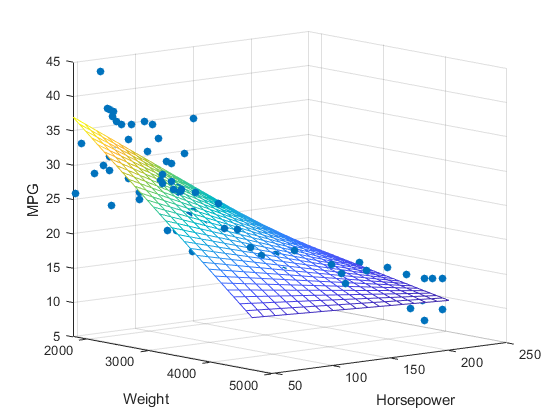

This assignment focuses on creating a mini-batch gradient decent linear regression model from scratch. Understanding linear regression, although a relatively simple tool in the AI arsenal, forms the basis of many fundamental AI algorithms to come.  



---



##Data and Parameter Preparation (Steps 1-3)
This section prepares the data from the csv file into numpy arrays and sets up the design and response vectors for vector multiplication in the mini batch gradient decent algorithm. Additionally, the alpha and batch size parameters are defined, and the initial beta parameter vector is initialized with random values from a uniform distribution between [-1,1).

In [ ]:
#Dependencies
import pandas as pd
import numpy as np
import copy as cp

#Data csv
url = 'https://raw.githubusercontent.com/racs2019/CAP-5625-A1-Data/main/Advertising_N200_p3.csv'
df = pd.read_csv(url)

In [ ]:
#Learning rate and batch size
alpha = 2.5 * (10**(-6))
n = 10

#Response matrix
ytemp = df['sales'].to_numpy()
y = np.ones((200,1))
y[:,0] = ytemp

#Design matrix
xtemp = df[['TV', 'radio', 'newspaper']].to_numpy()
x = np.ones((200, 4))
x[:,1] = xtemp[:,0]
x[:,2] = xtemp[:,1]
x[:,3] = xtemp[:,2]

In [ ]:
#Check that parameters and response/design matricies are correct
print('batch size:', n)
print('alpha:', alpha)
print('Y:', y.shape)
print('X:', x.shape)

batch size: 10
alpha: 2.4999999999999998e-06
Y: (200, 1)
X: (200, 4)


In [ ]:
#Initialize parameter vector beta as random variables from uniform distribution [-1,1)
betatemp = np.random.uniform(-1,1,4)
beta = np.ones((4,1))
beta[:,0] = betatemp

In [ ]:
#Check that the beta vector has been correctly initialized
print(beta)

[[ 0.1266416 ]
 [-0.68026902]
 [-0.35347911]
 [-0.82916915]]


In [ ]:
#Function to create batches, takes numpy design and response matrix as input
#returns a response and design array containing 200/n batches with each batch having n elements
def create_batches(x,y,n):
  B = 200/n

  #randomly shuffles and splits into batches the reponse and design vectors the same way
  shuffler = np.random.permutation(len(x))
  Xb = x[shuffler]
  Yb = y[shuffler]
  batch_array_design = np.split(Xb, B)
  batch_array_response = np.split(Yb, B)

  return batch_array_design, batch_array_response

In [ ]:
#Check that the create batches function works properly
batch_array_design, batch_array_response = create_batches(x,y,n)
print(batch_array_design[0], batch_array_response[0])

[[  1.   66.9  11.7  36.8]
 [  1.  219.8  33.5  45.1]
 [  1.   18.7  12.1  23.4]
 [  1.  213.5  43.   33.8]
 [  1.  135.2  41.7  45.9]
 [  1.   67.8  36.6 114. ]
 [  1.  248.4  30.2  20.3]
 [  1.  175.1  22.5  31.5]
 [  1.   23.8  35.1  65.9]
 [  1.  204.1  32.9  46. ]] [[ 9.7]
 [19.6]
 [ 6.7]
 [21.7]
 [17.2]
 [12.5]
 [20.2]
 [14.9]
 [ 9.2]
 [19. ]]


##Mini-Batch Gradient Decent (Steps 4-7)
This section implements the main mini-batch gradient decent algorithm. Through mini-batch gradient decent, the response/design matrices are separated into 20 batches of size 10 using an auxiliary function from the previous section, the beta parameters are updated for each batch, and then the process repeats for 20,000 iterations. The cost of each iteration and the beta parameters at the end of each iteration are stored in an array for graphing purposes in the next section.

In [ ]:
#Mini-batch gradient decent
batch_array_design, batch_array_response = create_batches(x,y,n)

cost_array = []
beta_array = [[],[],[],[]]

for i in range (0,20000):
  batch_array_design, batch_array_response = create_batches(x,y,n)
  for j in range(0,20):
    beta = beta + 2*alpha * np.dot(batch_array_design[j].transpose(), (batch_array_response[j] - np.dot(batch_array_design[j], beta)))

  for k in range(0,4):
    beta_array[k].append(beta[k][0])
  cost = np.dot((y - np.dot(x, beta)).transpose(), (y - np.dot(x, beta)))
  cost_array.append(cost[0][0])

In [ ]:
#Display the finial estimates 𝛽̂ = [𝛽̂0, 𝛽̂1, ... , 𝛽̂𝑝] of the best-fit model parameters
print(beta)

[[2.78384035e+00]
 [4.91581689e-02]
 [1.90128957e-01]
 [1.88927374e-03]]


##Graphs and Deliverables
This section displays the plot deliverables, the final estimates 𝛽̂ = [𝛽̂0, 𝛽̂1, ... , 𝛽̂𝑝] of the best-fit model parameters, and the mean squared error. The first graph shows how the beta parameters change as the iterations of mini-batch gradient decent progress, and the second graph shows the cost as the iterations progress.

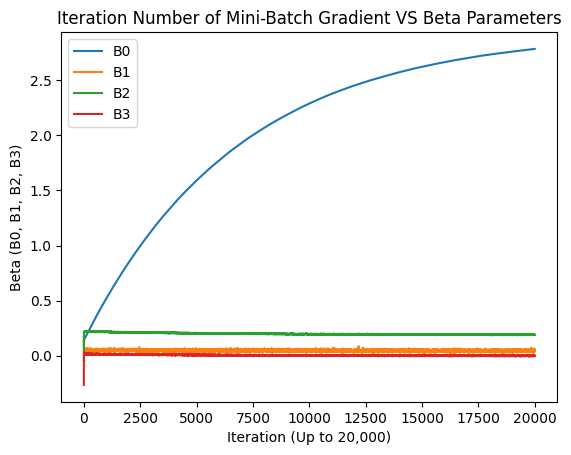

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the effect of iteration number on the beta value of each beta parameter
plt.plot(beta_array[0], label="B0")
plt.plot(beta_array[1], label="B1")
plt.plot(beta_array[2], label="B2")
plt.plot(beta_array[3], label="B3")
plt.title("Iteration Number of Mini-Batch Gradient VS Beta Parameters")
plt.xlabel("Iteration (Up to 20,000)")
plt.ylabel("Beta (B0, B1, B2, B3)")
leg = plt.legend(loc='upper left')
plt.show()

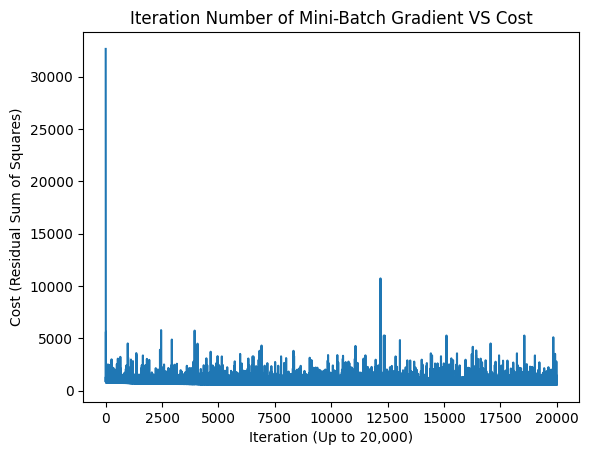

In [ ]:
#Plot the change in cost function as the iterations of mini-batch gradient decent increased
plt.title("Iteration Number of Mini-Batch Gradient VS Cost")
plt.xlabel("Iteration (Up to 20,000)")
plt.ylabel("Cost (Residual Sum of Squares)")
plt.plot(cost_array)
plt.show()

In [ ]:
#Compute and display mean squared error
print('Final estimates 𝛽̂ = [𝛽̂0, 𝛽̂1, 𝛽̂2, 𝛽̂3]:\n--------------------------------------')
print('𝛽̂0 = ', beta[0][0], '\n𝛽̂1 = ', beta[1][0], '\n𝛽̂2 = ', beta[2][0], '\n𝛽̂3 = ', beta[3][0])
MSE = (np.dot((y - np.dot(x, beta)).transpose(), (y - np.dot(x, beta))))/(len(y))
print('\nMean Squared Error:\n-----------------\n', MSE[0][0])

Final estimates 𝛽̂ = [𝛽̂0, 𝛽̂1, 𝛽̂2, 𝛽̂3]:
--------------------------------------
𝛽̂0 =  2.7838403491622126 
𝛽̂1 =  0.04915816894239502 
𝛽̂2 =  0.1901289567866186 
𝛽̂3 =  0.0018892737354856048

Mean Squared Error:
-----------------
 3.098534923755786


##Sklearn Linear Regression (used as a check)
This final section uses the Sklearn library to run a linear regression model and output the final 𝛽̂ = [𝛽̂0, 𝛽̂1, 𝛽̂2, 𝛽̂3] coefficients as a way of checking how well my from scratch linear regression performed. As you can see, the parameters and MSE are very similar to the from scratch results.

In [ ]:
##Sklearn multiple linear regression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

url = 'https://raw.githubusercontent.com/racs2019/CAP-5625-A1-Data/main/Advertising_N200_p3.csv'
df = pd.read_csv(url)

x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print(model.coef_)
print(model.intercept_)

mean_squared_error :  2.2987166978863796
mean_absolute_error :  1.213745773614481
[ 0.04469599  0.1875657  -0.00032275]
3.1515267680706547
